In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from   astropy.table import Table

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

In [3]:
from   vmaxer import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod, volcom
from   lumfn import lumfn
from   schechter import schechter

In [4]:
gama_zmax = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_zmax_100k.fits')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877281170306,38.987333956711154,1.0760765,0.8610029493925443,0,6,-0.004304008086476699,0.2107695500893384,0.2234659946412858,0.5710036633045628,0.7285388389050824,0.8,-0.1779077,-0.14672801,-19.57981874445852,-19.61099844078001,39.032892246045435,39.06407194236692,0.34692574,0.2135815895744408,0.0,-7.4530735,0.006958905023054331,0.0
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.83891632496017,38.05776114234527,0.7318821,0.6893753080282159,0,4,-0.0819652807509548,-0.03945849344225659,0.14069395795487755,0.2577107115998888,0.6148653416919028,2.12,-0.1205613,-0.2634948,-20.47429997229798,-20.33136648440583,38.07789379859193,37.93496031069978,2.1964054,0.29258544740834863,0.0,-5.603594,0.009662334364197148,0.0
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.4904174319889,38.92839425713693,1.2004261,0.9721022317088284,0,6,0.0058391854325142295,0.23416305540825627,0.2365374787937211,0.6269925037399601,0.8099710767383314,0.8,-0.17363001,-0.14320001,-20.552184290228098,-20.58261429422876,38.99130172186872,39.02173172586939,1.3608818,0.30527630846058035,0.0,-6.4391174,0.010852458684183162,0.0
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.17133436591314,38.02205556041388,0.41841125,0.3893481424147275,0,3,-0.10094461324771158,-0.07188150077962656,0.08028614792542539,0.12193705781293117,0.37676034499530675,2.12,-0.1187474,-0.2595304,-18.648398768700215,-18.507615771688076,37.983594310082054,37.842811313069916,0.4648037,0.14150820212226742,0.0,-7.3351955,0.004195379248669395,0.0
585603,588848899914203511,183.50219516,-0.16954766,19.42929,0.08914,4,G12_Y3_022_170,5,20.404564,19.604887,19.355776,19.150723,19.380806,286.07271379559756,37.282382179394425,0.24911118,0.25921542614595333,0,2,-0.10249707668751229,-0.11260132729635533,0.06318190720727612,0.04488036604559115,0.26741271669879435,2.12,-0.0864658,-0.18897678,-17.82980751679894,-17.72729653553721,37.25909828828331,37.15658730702158,0.37070847,0.10060097211034247,0.0,-7.429291,0.002932327618374006,0.0
585607,588848899914268848,183.60160175,-0.18627266,18.615673,0.18484,4,G12_Y6_057_048,6,19.831152,19.083632,18.618288,18.319872,18.317358,632.7514193386862,39.00616564003465,0.46534348,0.3271754608358587,0,2,-0.12224092872758091,0.0159270857783622,0.04929777637773486,0.1910928313923645,0.32354842032716724,2.12,-0.1792948,-0.39186075,-20.260495556428943,-20.047929597929034,38.87616862161449,38.66360266311458,1.1843262,0.28865454742120283,0.0,-6.615673,0.008490765793333774,0.0
585606,588848899914268827,183.57423313,-0.07826632,17.959646,0.24766,5,4330342247851098112,6,22.035128,19.377728,17.913776,17.397978,17.044468,880.8085931674992,39.724407714803846,1.4639511,1.0187620089417166,0,6,0.1152454090575456,0.5604345109556725,0.35103175304364315,0.9608665324449894,0.8541163314384974,0.8,-0.2402302,-0.198128

In [5]:
zmin = gama_zmax['ZGAMA'].min()
zmax = gama_zmax['ZGAMA'].max()

In [6]:
gama_vmax = vmaxer(gama_zmax, zmin, zmax, 180., extra_cols=['MCOLOR_0P0'])
gama_vmax = gama_vmax[gama_vmax['ZMAX'] > 0.0]
gama_vmax

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/astropy/cosmology/core.py:1250: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  f = lambda z1, z2: quad(self._inv_efunc_scalar, z1, z2,
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2192: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.18341,0.03903000056743622,0.2135815895744408,-19.61099844078001,4188025.815140201,2693444.0604013824
0.12429,0.03903000056743622,0.26298999786376953,-20.33136648440583,7594841.842906503,850241.8475629976
0.179,0.03903000056743622,0.26298999786376953,-20.58261429422876,7594841.842906503,2508836.914977657
0.12242,0.03903000056743622,0.14150820212226742,-18.507615771688076,1254766.50670282,812127.9923160608
0.08914,0.03903000056743622,0.10060097211034247,-17.72729653553721,444168.3941588216,302561.1197063563
0.18484,0.03903000056743622,0.26298999786376953,-20.047929597929034,7594841.842906503,2755090.560379113
0.24766,0.03903000056743622,0.26298999786376953,-21.91766524297013,7594841.842906503,6402118.758064065
0.20493,0.03903000056743622,0.26298999786376953,-20.151185409851355,7594841.842906503,3716799.7316363472


Text(0.5, 0, 'ZMAX')

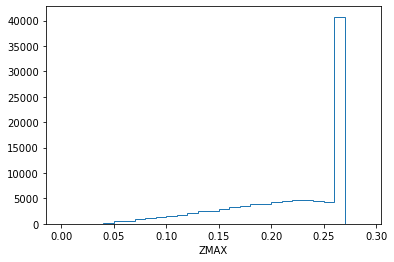

In [7]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [8]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03945127])

Text(0, 0.5, 'ZMAX')

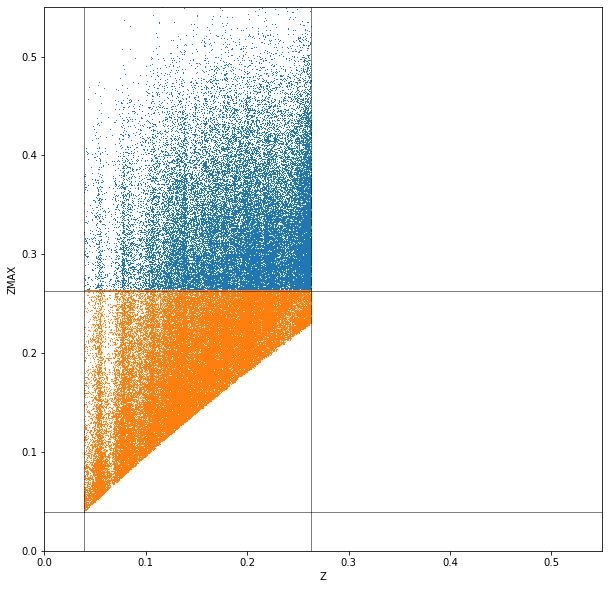

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)

ax.axvline(zmin, c='k', lw=0.5) 
ax.axvline(zmax, c='k', lw=0.5) 

ax.axhline(zmin, c='k', lw=0.5) 
ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel('Z')
ax.set_ylabel('ZMAX')

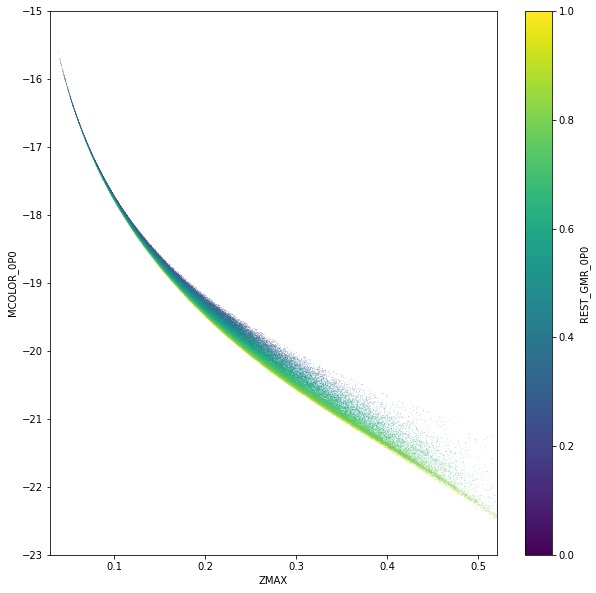

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc=ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)
# ax.plot(gama_vmax['ZMAX'], gama_vmax['MCOLOR_0P0'], marker=',', lw=0.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel('ZMAX')
ax.set_ylabel('MCOLOR_0P0')

plt.colorbar(sc, label='REST_GMR_0P0')

Text(0, 0.5, 'DEC')

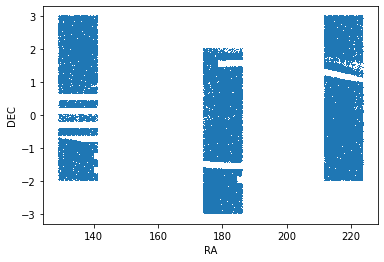

In [11]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlabel('RA')
pl.ylabel('DEC')

<ipython-input-12-254ee48db0d5>:10: RuntimeWarning: invalid value encountered in log10
  pl.plot(result[:,0], np.log10(result[:,3]), label='IVMAX')


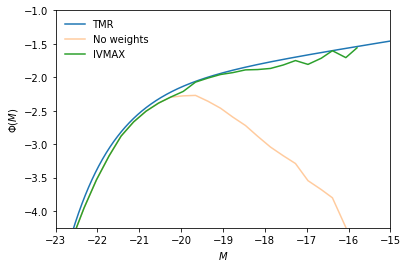

In [12]:
VV      = volcom(gama_vmax['ZGAMA'].max(), 180.) - volcom(gama_vmax['ZGAMA'].min(), 180.)
result  = lumfn(gama_vmax, VV)

Ms      = np.arange(-23., -15., 0.01)
tmr_phi = schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(tmr_phi), label='TMR')

pl.plot(result[:,0], np.log10(result[:,1]), label='No weights', alpha=0.4)
pl.plot(result[:,0], np.log10(result[:,3]), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, '(V/VMAX)')

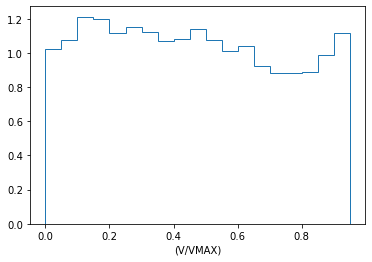

In [31]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)
pl.xlabel('(V/VMAX)')

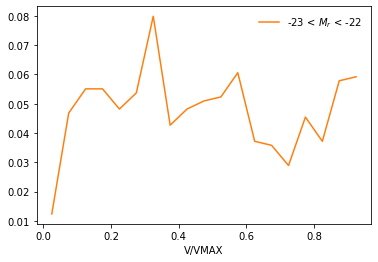

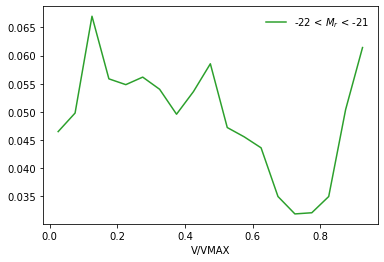

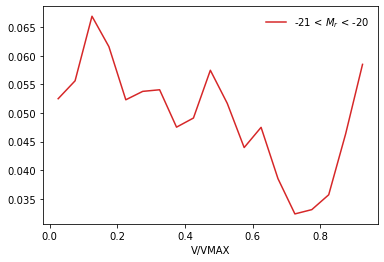

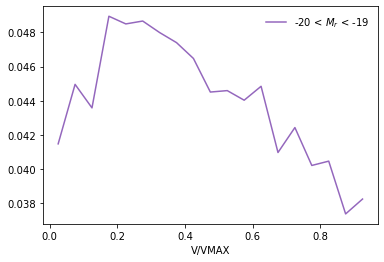

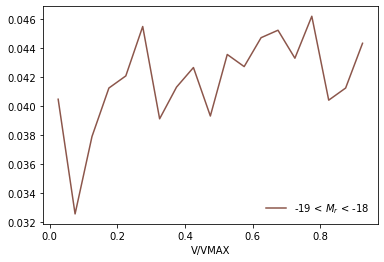

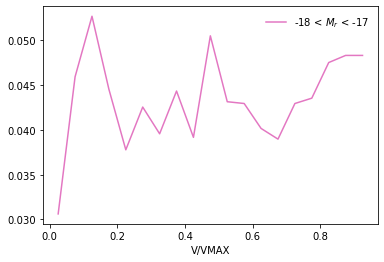

In [22]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.0, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [12]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,348.95950671254064,37.71387517159247,1.0383816,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,37.75259506392482,37.770842862010035,5.4717884,0.6382359051415024,1.0,-2.3282108,0.039451269494496816,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,896.959179230692,39.76386339337955,1.4456768,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,39.868426780897494,39.911202188331,5.374646,-99.0,2.0,-2.425353,0.0960437346744793,0.0
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,276.97126444400743,37.212173568413235,0.039456367,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,37.19130046586948,37.09185997317987,5.343422,1.2073547082138247,1.0,-2.4565773,0.027381056216335225,0.0
423776,587728879796093009,137.38205797,2.9559053,14.904024,0.14906,4,G09_Y1_FX1_283,6,16.738531,15.69086,14.949677,14.424865,14.620418,498.5745074806278,38.488650344529816,0.7411823,0.6530574215121244,0,4,-0.0658698376204572,0.022255068137926215,0.15431270736417704,0.30596734437310263,0.5895276902615822,2.12,-0.1445882,-0.31600717,-23.594350725510402,-23.42293176064758,38.49837484965591,38.32695588479309,4.895975,-99.0,2.0,-2.9040241,0.039007252421072156,0.0
744812,588848899391553693,216.01587484,-0.44945953,16.054071,0.15084,4,2dF326935,4,16.147621,16.111952,16.034607,15.675366,15.818611,505.1235453874865,38.516988064038,0.077344894,0.011981082513680429,0,1,-0.14064978791986665,-0.07528597602436739,0.02063093138650743,0.05255863546425736,0.045417190331429755,2.12,-0.1463148,-0.31978077,-22.337232769247294,-22.16376680206895,38.391304195638895,38.21783822846055,3.7459278,-99.0,2.0,-4.0540714,0.022139311523301737,0.0
238590,587726014547296416,214.85066147,1.65660328,16.225485,0.17129,5,601291331775522816,6,18.006985,16.828287,16.18838,15.845658,15.707829,581.3150970192283,38.82205800964694,0.63990784,0.5185954847151615,0,3,-0.07721397657361989,0.044098375625281044,0.1251964387819956,0.2801142386612473,0.4849900370348108,2.12,-0.1661513,-0.36313477,-22.5556183003338,-22.358634828821007,38.781103148356266,38.58411967684347,3.5745144,-99.0,2.0,-4.225485,0.02423161111994514,0.0
324842,587726032766828783,137.45671026,1.81320872,16.396177,0.18183,5,530437151989458944,6,18.082561,16.9356,16.243526,15.840984,15.599765,621.260522466335,38.96636878786481,0.6920738,0.5466785077227654,0,4,-0.06779011604108497,0.0776051982576339,0.13938299942125865,0.3233229693907538,0.5081338520519892,2.12,-0.1763751,-0.3854796,-22.53319938943889,-22.324094896178508,38.92937668130901,38.72027218804862

In [13]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.